# Create data for machine learning

## Read data files

In [1]:
import os
from pathlib import Path

import pandas as pd


sourceDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '00_source_files')
extractDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '01_extracted_data')

In [2]:
admissionsDf = pd.read_csv(Path(sourceDirName, '2024-04-03-admissions.csv'))
admissionsDf

,PATIENT_ID,EPISODE_ID,PARENT_EPISODE_ID,start_date,end_date,PRIMARY_VISIT_REASON,E_LOS,H_LOS,DATEOFDEATH_DATETIME,ADMIT_TYPE,ADMITTING_WARD,EPISODE_ORGANISM_IDENTIFIED,ORGANISM,Organism_FIRST_NOTED,Organism_LAST_NOTED
0,2141606,8800,8800,2013-08-31 10:14:00.000,2013-08-31 15:04:00.000,DIALYSIS,5.00,5.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
1,2141606,8800,8800,2013-08-31 10:14:00.000,2013-08-31 15:04:00.000,DIALYSIS,5.00,5.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,9984732,Staphylococcus aureus (MRSA),2014-08-31 08:17:49.000,2014-08-31 08:17:49.000
2,2141606,9467,9467,2013-09-03 13:30:00.000,2013-09-03 17:36:00.000,DIALYSIS,4.00,4.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
3,2141606,9467,9467,2013-09-03 13:30:00.000,2013-09-03 17:36:00.000,DIALYSIS,4.00,4.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,9984732,Staphylococcus aureus (MRSA),2014-08-31 08:17:49.000,2014-08-31 08:17:49.000
4,2141606,9871,9871,2013-09-05 11:00:00.000,2013-09-06 18:16:00.000,CONSTIPATION & BLOATING - PHX UMBILICAL HERNIA,31.00,31.00,2020-07-10 14:00:00.000,Admission from ED,A-CC - Emergency Dept Cubicles,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216684,642636,18390389,18390389,2024-01-17 11:45:00.000,2024-01-24 23:59:59.000,NaN,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216685,642636,18406829,18406829,2024-02-27 15:45:00.000,2024-03-05 23:59:59.000,4 Month Review,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216686,642636,18690618,18690618,2024-02-27 12:30:00.000,2024-03-05 23:59:59.000,NaN,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216687,642636,18696838,18696838,2024-02-28 08:28:23.000,2024-02-28 15:08:00.000,Chest pain NEC,6.67,6.67,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000


In [3]:
vitalsDf = pd.read_csv(Path(extractDirName, 'vitals_raw.csv'))
vitalsDf

,measurement_id,visit_occurrence_id,person_id,measurement_datetime,concept_name,value_as_number
0,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
1,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
2,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
3,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
4,28199822,12775207,2229451,2019-08-30 20:27:27,Brain structure,36.0
...,...,...,...,...,...,...
15677830,78689530,15795398,2571731,2021-12-27 19:07:05,Urinary bladder structure,37.1
15677831,78708186,15795398,2571731,2021-12-27 00:09:40,Urinary bladder structure,37.1
15677832,77615583,15795398,2571731,2021-12-07 19:02:31,Urinary bladder structure,36.2
15677833,78348958,15795398,2571731,2021-12-20 18:55:38,Urinary bladder structure,38.9


In [4]:
selectedVitals = ["Peripheral oxygen saturation", "Respiratory rate", "Temperature", "Systolic blood pressure", "Diastolic blood pressure", "Mean blood pressure", "Heart rate"]
vitalsDf = vitalsDf[vitalsDf.concept_name.isin(selectedVitals)].drop_duplicates()
vitalsDf["measurement_datetime"] = pd.to_datetime(vitalsDf["measurement_datetime"]).dt.strftime('%Y-%m-%d')
vitalsDf

,measurement_id,visit_occurrence_id,person_id,measurement_datetime,concept_name,value_as_number
378295,84004766,16293635,2599003,2022-04-08,Temperature,35.9
378296,24703131,12591406,2202499,2019-07-14,Temperature,36.5
378297,39259423,15198519,2015831,2021-09-03,Temperature,36.8
378298,84662503,16293635,2599003,2022-04-20,Temperature,36.8
378299,84382995,16293635,2599003,2022-04-15,Temperature,37.8
...,...,...,...,...,...,...
15641534,82881537,16248898,2046775,2022-03-20,Respiratory rate,17.0
15641535,83183441,16282402,2119654,2022-03-25,Respiratory rate,18.0
15641537,82883702,16248898,2046775,2022-03-20,Respiratory rate,15.0
15641539,82886013,16248898,2046775,2022-03-20,Respiratory rate,20.0


In [5]:
vitalsDf.concept_name.value_counts()

concept_name
Peripheral oxygen saturation    1095446
Respiratory rate                1065446
Heart rate                       895846
Mean blood pressure              787601
Systolic blood pressure          761994
Diastolic blood pressure         761361
Temperature                      739108
Name: count, dtype: int64

In [6]:
import pandas as pd


vitalsPivotedDf = pd.pivot_table(vitalsDf, values=['value_as_number'], index=['measurement_id', 'visit_occurrence_id', 'person_id', 'measurement_datetime'], columns=['concept_name']).droplevel(level=0, axis=1).reset_index()
vitalsPivotedDf = vitalsPivotedDf.sort_values(by=['person_id', 'visit_occurrence_id', 'measurement_datetime', 'measurement_id'], ascending=True)
vitalsPivotedDf

concept_name,measurement_id,visit_occurrence_id,person_id,measurement_datetime,Diastolic blood pressure,Heart rate,Mean blood pressure,Peripheral oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature
987937,17276146,12790706,18849,2019-09-01,NaN,NaN,NaN,NaN,22.0,NaN,NaN
987938,17276147,12790706,18849,2019-09-01,74.0,NaN,NaN,NaN,NaN,NaN,NaN
987939,17276184,12790706,18849,2019-09-01,NaN,NaN,NaN,96.0,NaN,NaN,NaN
987940,17276185,12790706,18849,2019-09-01,NaN,NaN,NaN,NaN,NaN,132.0,NaN
987941,17276197,12790706,18849,2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN,35.5
...,...,...,...,...,...,...,...,...,...,...,...
179104,5136519,17565632,2684042,2023-04-01,NaN,NaN,NaN,NaN,20.0,NaN,NaN
202453,5814399,17565632,2684042,2023-04-01,NaN,NaN,NaN,NaN,NaN,103.0,NaN
202454,5814400,17565632,2684042,2023-04-01,52.0,NaN,NaN,NaN,NaN,NaN,NaN
202455,5814401,17565632,2684042,2023-04-01,NaN,84.0,NaN,NaN,NaN,NaN,NaN


In [7]:
VitalsFormattedDf = vitalsPivotedDf.groupby(
    by=['person_id', 'visit_occurrence_id', 'measurement_datetime']
    ).agg(
        {
            'Diastolic blood pressure': [
            ('Diastolic blood pressure_mean', 'mean'),
            ('Diastolic blood pressure_min', 'min'),
            ('Diastolic blood pressure_max', 'max'),
            ('Diastolic blood pressure_first', 'first'),
            ('Diastolic blood pressure_last', 'last'),
            ('Diastolic blood pressure_std', 'std'),
            ],
            'Heart rate': [
            ('Heart rate_mean', 'mean'),
            ('Heart rate_min', 'min'),
            ('Heart rate_max', 'max'),
            ('Heart rate_first', 'first'),
            ('Heart rate_last', 'last'),
            ('Heart rate_std', 'std'),
            ],
            'Mean blood pressure': [
            ('Mean blood pressure_mean', 'mean'),
            ('Mean blood pressure_min', 'min'),
            ('Mean blood pressure_max', 'max'),
            ('Mean blood pressure_first', 'first'),
            ('Mean blood pressure_last', 'last'),
            ('Mean blood pressure_std', 'std'),
            ],
            'Peripheral oxygen saturation': [
            ('Peripheral oxygen saturation_mean', 'mean'),
            ('Peripheral oxygen saturation_min', 'min'),
            ('Peripheral oxygen saturation_max', 'max'),
            ('Peripheral oxygen saturation_first', 'first'),
            ('Peripheral oxygen saturation_last', 'last'),
            ('Peripheral oxygen saturation_std', 'std'),
            ],
            'Respiratory rate': [
            ('Respiratory rate_mean', 'mean'),
            ('Respiratory rate_min', 'min'),
            ('Respiratory rate_max', 'max'),
            ('Respiratory rate_first', 'first'),
            ('Respiratory rate_last', 'last'),
            ('Respiratory rate_std', 'std'),
            ],
            'Systolic blood pressure': [
            ('Systolic blood pressure_mean', 'mean'),
            ('Systolic blood pressure_min', 'min'),
            ('Systolic blood pressure_max', 'max'),
            ('Systolic blood pressure_first', 'first'),
            ('Systolic blood pressure_last', 'last'),
            ('Systolic blood pressure_std', 'std'),
            ],
            'Temperature': [
            ('Temperature_mean', 'mean'),
            ('Temperature_min', 'min'),
            ('Temperature_max', 'max'),
            ('Temperature_first', 'first'),
            ('Temperature_last', 'last'),
            ('Temperature_std', 'std'),
            ],
        }
    ).droplevel(level=0, axis=1).reset_index()
VitalsFormattedDf

,person_id,visit_occurrence_id,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Systolic blood pressure_max,Systolic blood pressure_first,Systolic blood pressure_last,Systolic blood pressure_std,Temperature_mean,Temperature_min,Temperature_max,Temperature_first,Temperature_last,Temperature_std
0,18849,12790706,2019-09-01,63.750000,50.0,74.0,74.0,69.0,7.497619,96.500000,...,155.0,132.0,138.0,12.199971,37.477778,35.5,40.6,35.5,36.9,1.605286
1,18849,12790706,2019-09-02,55.750000,48.0,61.0,54.0,48.0,6.020797,88.000000,...,121.0,120.0,105.0,7.788881,36.875000,36.2,38.1,36.8,36.4,0.853913
2,18849,12790706,2019-09-03,55.000000,47.0,69.0,48.0,47.0,10.165300,90.000000,...,129.0,127.0,111.0,8.341663,36.750000,36.1,37.7,37.7,36.1,0.695222
3,41308,14824675,2021-05-31,59.000000,55.0,63.0,55.0,63.0,5.656854,104.000000,...,124.0,121.0,124.0,2.121320,29.900000,29.9,29.9,29.9,29.9,NaN
4,41308,14824675,2021-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146586,2682433,17536805,2023-03-25,76.095238,62.0,93.0,74.0,69.0,8.111133,67.324324,...,128.0,109.0,101.0,7.405918,35.788889,35.2,36.2,36.2,35.9,0.321887
146587,2682433,17536805,2023-03-26,89.500000,82.0,99.0,82.0,90.0,7.141428,61.000000,...,128.0,104.0,128.0,11.324752,35.800000,35.5,36.0,35.9,36.0,0.264575
146588,2684042,17565390,2023-03-31,65.000000,58.0,72.0,58.0,72.0,9.899495,97.000000,...,125.0,116.0,125.0,6.363961,NaN,NaN,NaN,NaN,NaN,NaN
146589,2684042,17565390,2023-04-01,51.400000,48.0,53.0,52.0,53.0,1.949359,NaN,...,112.0,112.0,104.0,4.086563,36.100000,36.0,36.2,36.0,36.1,0.100000


In [8]:
icdsDf = pd.read_csv(Path(sourceDirName, '2023-03-20-blood-pos-ICDs.csv'))
icdsDf

/tmp/ipykernel_361745/505271447.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  icdsDf = pd.read_csv(Path(sourceDirName, '2023-03-20-blood-pos-ICDs.csv'))


,EPISODE_ID,PATIENT_ID,AUSTRALIAN_MODIFICATION,PREFIX,ICD_DESCRIPTION,RANK,ICD10CODE
0,17135310,2161346,Z029,P,"Examination for administrative purposes, unspe...",1,NaN
1,17107985,2147565,Z029,P,"Examination for administrative purposes, unspe...",1,NaN
2,17106652,2182523,Z029,P,"Examination for administrative purposes, unspe...",1,NaN
3,17103071,2200486,Z491,P,Extracorporeal dialysis,1,NaN
4,17103049,2200486,Z491,P,Extracorporeal dialysis,1,NaN
...,...,...,...,...,...,...,...
456643,9,2089883,M8199,P,"Unspecified osteoporosis, site unspecified",8,NaN
456644,9,2089883,I10,P,Essential (primary) hypertension,7,NaN
456645,9,2089883,E86,P,Volume depletion,6,NaN
456646,9,2089883,U739,P,Unspecified activity,5,NaN


In [9]:
sepsisDf = icdsDf[(icdsDf.AUSTRALIAN_MODIFICATION.str.startswith('A40')) | (icdsDf.AUSTRALIAN_MODIFICATION.str.startswith('A41'))][['EPISODE_ID', 'PATIENT_ID']].drop_duplicates()
sepsisDf['sepsis'] = 1
sepsisDf

,EPISODE_ID,PATIENT_ID,sepsis
221,17030802,2188789,1
336,17003144,1466886,1
439,16982177,2097130,1
1124,16875811,2090730,1
1241,16859246,2193278,1
...,...,...,...
454745,10444,2135518,1
454885,9543,2143511,1
455084,8251,2100912,1
456046,3055,542353,1


## Create balanced data

In [10]:
notsepsisDf = admissionsDf[~admissionsDf[['PATIENT_ID', 'EPISODE_ID']].set_index(['PATIENT_ID', 'EPISODE_ID']).index.isin(sepsisDf.set_index(['PATIENT_ID', 'EPISODE_ID']).index)][['PATIENT_ID', 'EPISODE_ID']]
notsepsisDf = notsepsisDf.sample(n=sepsisDf.drop_duplicates().shape[0])
notsepsisDf

,PATIENT_ID,EPISODE_ID
73777,2116387,9542748
59384,2009242,7925908
57412,2007860,7876702
117187,2020000,12953051
170488,2133099,15069726
...,...,...
127565,2152424,13351136
168709,2019594,14994416
53755,1951208,7375551
188320,2130904,16109038


In [11]:
balancedDf = pd.concat([sepsisDf[['PATIENT_ID', 'EPISODE_ID']], notsepsisDf], ignore_index=True)
balancedDf

,PATIENT_ID,EPISODE_ID
0,2188789,17030802
1,1466886,17003144
2,2097130,16982177
3,2090730,16875811
4,2193278,16859246
...,...,...
7961,2152424,13351136
7962,2019594,14994416
7963,1951208,7375551
7964,2130904,16109038


## Merge all the files

In [12]:
dataDf = admissionsDf[['PATIENT_ID', 'EPISODE_ID', 'Organism_FIRST_NOTED']].drop_duplicates().merge(
    balancedDf,
    how='inner',
    on=['PATIENT_ID', 'EPISODE_ID'],
).merge(
    VitalsFormattedDf,
    how='inner',
    left_on=['PATIENT_ID', 'EPISODE_ID'],
    right_on=['person_id', 'visit_occurrence_id']
).drop(columns=['person_id', 'visit_occurrence_id']).merge(
    sepsisDf,
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID']
).fillna({'sepsis': 0})
dataDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,...,Systolic blood pressure_first,Systolic blood pressure_last,Systolic blood pressure_std,Temperature_mean,Temperature_min,Temperature_max,Temperature_first,Temperature_last,Temperature_std,sepsis
0,1548773,145028,2016-01-18 19:15:50.000,2015-06-03,65.000000,65.0,65.0,65.0,65.0,NaN,...,108.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1548773,145028,2015-09-20 15:09:58.000,2015-06-03,65.000000,65.0,65.0,65.0,65.0,NaN,...,108.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1548773,145028,2016-01-14 14:57:44.000,2015-06-03,65.000000,65.0,65.0,65.0,65.0,NaN,...,108.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,1548773,145028,2016-01-14 14:57:50.000,2015-06-03,65.000000,65.0,65.0,65.0,65.0,NaN,...,108.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,763090,160193,2015-08-02 08:29:29.000,2015-12-24,0.000000,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40136,1763147,17607707,2023-04-15 11:57:38.000,2023-04-18,70.500000,63.0,83.0,83.0,68.0,7.765307,...,136.0,108.0,11.940128,36.366667,36.0,36.7,36.7,36.7,0.280476,0.0
40137,1763147,17607707,2023-04-15 11:57:38.000,2023-04-19,87.666667,81.0,95.0,95.0,81.0,7.023769,...,139.0,107.0,16.010413,36.300000,36.2,36.4,36.2,36.4,0.141421,0.0
40138,2202513,17625821,2023-04-28 14:04:14.000,2023-04-20,64.000000,64.0,64.0,64.0,64.0,NaN,...,121.0,121.0,NaN,36.000000,36.0,36.0,36.0,36.0,NaN,0.0
40139,2240165,17881084,2023-07-12 16:31:29.000,2023-07-04,42.000000,41.0,43.0,43.0,41.0,1.414214,...,121.0,114.0,4.949747,36.350000,36.3,36.4,36.4,36.3,0.070711,0.0


In [13]:
dataDf["Organism_FIRST_NOTED"] = pd.to_datetime(dataDf["Organism_FIRST_NOTED"]).dt.strftime('%Y-%m-%d')
dataDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,...,Systolic blood pressure_first,Systolic blood pressure_last,Systolic blood pressure_std,Temperature_mean,Temperature_min,Temperature_max,Temperature_first,Temperature_last,Temperature_std,sepsis
0,1548773,145028,2016-01-18,2015-06-03,65.000000,65.0,65.0,65.0,65.0,NaN,...,108.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1548773,145028,2015-09-20,2015-06-03,65.000000,65.0,65.0,65.0,65.0,NaN,...,108.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1548773,145028,2016-01-14,2015-06-03,65.000000,65.0,65.0,65.0,65.0,NaN,...,108.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,1548773,145028,2016-01-14,2015-06-03,65.000000,65.0,65.0,65.0,65.0,NaN,...,108.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,763090,160193,2015-08-02,2015-12-24,0.000000,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40136,1763147,17607707,2023-04-15,2023-04-18,70.500000,63.0,83.0,83.0,68.0,7.765307,...,136.0,108.0,11.940128,36.366667,36.0,36.7,36.7,36.7,0.280476,0.0
40137,1763147,17607707,2023-04-15,2023-04-19,87.666667,81.0,95.0,95.0,81.0,7.023769,...,139.0,107.0,16.010413,36.300000,36.2,36.4,36.2,36.4,0.141421,0.0
40138,2202513,17625821,2023-04-28,2023-04-20,64.000000,64.0,64.0,64.0,64.0,NaN,...,121.0,121.0,NaN,36.000000,36.0,36.0,36.0,36.0,NaN,0.0
40139,2240165,17881084,2023-07-12,2023-07-04,42.000000,41.0,43.0,43.0,41.0,1.414214,...,121.0,114.0,4.949747,36.350000,36.3,36.4,36.4,36.3,0.070711,0.0


In [14]:
dataDf = dataDf.drop(columns=['Organism_FIRST_NOTED']).merge(
    dataDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'Organism_FIRST_NOTED': [('Organism_FIRST_NOTED_updated', 'first')]}).droplevel(level=0, axis=1).reset_index(),
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID']
).rename(
    columns={'Organism_FIRST_NOTED_updated': 'Organism_FIRST_NOTED'}
)
dataDf


,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Systolic blood pressure_last,Systolic blood pressure_std,Temperature_mean,Temperature_min,Temperature_max,Temperature_first,Temperature_last,Temperature_std,sepsis,Organism_FIRST_NOTED
0,1548773,145028,2015-06-03,65.000000,65.0,65.0,65.0,65.0,NaN,NaN,...,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2016-01-18
1,1548773,145028,2015-06-03,65.000000,65.0,65.0,65.0,65.0,NaN,NaN,...,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2016-01-18
2,1548773,145028,2015-06-03,65.000000,65.0,65.0,65.0,65.0,NaN,NaN,...,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2016-01-18
3,1548773,145028,2015-06-03,65.000000,65.0,65.0,65.0,65.0,NaN,NaN,...,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2016-01-18
4,763090,160193,2015-12-24,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2015-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40136,1763147,17607707,2023-04-18,70.500000,63.0,83.0,83.0,68.0,7.765307,86.2,...,108.0,11.940128,36.366667,36.0,36.7,36.7,36.7,0.280476,0.0,2023-04-15
40137,1763147,17607707,2023-04-19,87.666667,81.0,95.0,95.0,81.0,7.023769,79.0,...,107.0,16.010413,36.300000,36.2,36.4,36.2,36.4,0.141421,0.0,2023-04-15
40138,2202513,17625821,2023-04-20,64.000000,64.0,64.0,64.0,64.0,NaN,75.0,...,121.0,NaN,36.000000,36.0,36.0,36.0,36.0,NaN,0.0,2023-04-28
40139,2240165,17881084,2023-07-04,42.000000,41.0,43.0,43.0,41.0,1.414214,65.5,...,114.0,4.949747,36.350000,36.3,36.4,36.4,36.3,0.070711,0.0,2023-07-12


In [15]:
countDf = dataDf.groupby(by=['PATIENT_ID', 'EPISODE_ID', 'Organism_FIRST_NOTED', 'measurement_datetime', 'sepsis']).agg({'PATIENT_ID': [('count_value', 'count')]}).droplevel(level=0, axis=1).reset_index()
countDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_datetime,sepsis,count_value
0,18849,12790706,2019-09-01,2019-09-01,0.0,1
1,18849,12790706,2019-09-01,2019-09-02,0.0,1
2,18849,12790706,2019-09-01,2019-09-03,0.0,1
3,53162,15749998,2022-01-06,2021-11-29,0.0,2
4,53162,15749998,2022-01-06,2021-11-30,0.0,2
...,...,...,...,...,...,...
20416,2676371,17444357,2023-04-21,2023-04-11,0.0,4
20417,2676371,17444357,2023-04-21,2023-04-12,0.0,4
20418,2676371,17444357,2023-04-21,2023-04-13,0.0,4
20419,2676371,17444357,2023-04-21,2023-04-14,0.0,4


In [16]:
countDf.count_value.apply(lambda x: x if (x < 10) else None).value_counts()/countDf.shape[0] * 100

count_value
1.0    53.444983
2.0    23.970423
3.0     9.034817
4.0     7.516772
5.0     2.379903
6.0     1.527839
7.0     1.199745
8.0     0.460310
9.0     0.259537
Name: count, dtype: float64

In [17]:
dataDf.measurement_datetime = pd.to_datetime(dataDf.measurement_datetime)
dataDf.Organism_FIRST_NOTED = pd.to_datetime(dataDf.Organism_FIRST_NOTED)
measurementRangesDf = dataDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'measurement_datetime': [('measurement_datetime_min', 'min'), ('measurement_datetime_max', 'max')]}).droplevel(level=0, axis=1).reset_index()
measurementRangesDf['measurement_datetime_range'] = (measurementRangesDf.measurement_datetime_max - measurementRangesDf.measurement_datetime_min)
measurementRangesDf

,PATIENT_ID,EPISODE_ID,measurement_datetime_min,measurement_datetime_max,measurement_datetime_range
0,18849,12790706,2019-09-01,2019-09-03,2 days
1,53162,15749998,2021-11-29,2021-12-02,3 days
2,62567,12648702,2019-07-25,2019-08-15,21 days
3,110792,15535238,2021-10-19,2021-10-25,6 days
4,110792,15611828,2021-11-03,2021-11-16,13 days
...,...,...,...,...,...
1382,2642979,17356882,2023-01-31,2023-02-23,23 days
1383,2645864,17534577,2023-04-06,2023-04-06,0 days
1384,2647958,17418069,2023-02-17,2023-03-30,41 days
1385,2657695,17124244,2022-11-19,2022-12-06,17 days


<Axes: >

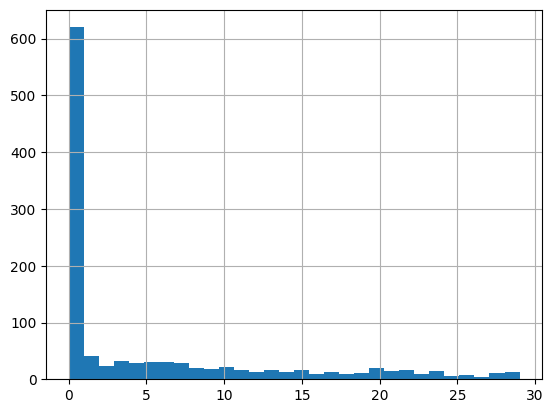

In [18]:
measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: x if x < 30 else None).hist(bins=30)

<Axes: >

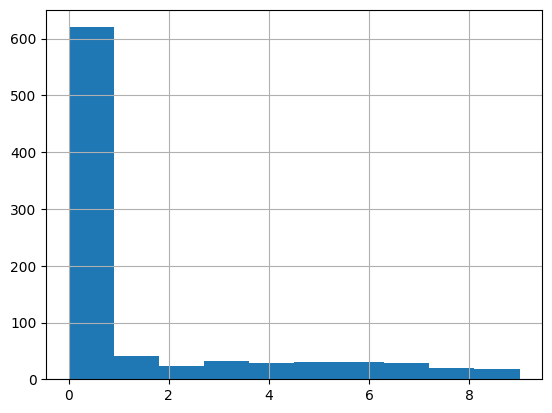

In [19]:
measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: x if x < 10 else None).hist(bins=10)

In [20]:
measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: x if x < 10 else None).value_counts().sort_index()

measurement_datetime_range
0.0    620
1.0     41
2.0     24
3.0     33
4.0     28
5.0     31
6.0     30
7.0     29
8.0     19
9.0     18
Name: count, dtype: int64

In [21]:
from datetime import timedelta


look_back = 3
measurementRangesDf['delta_days'] = measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: ((look_back - 1) - x)).apply(lambda x: x if x > 0 else 0)
measurementRangesDf['measurement_datetime_min_updated'] = measurementRangesDf.apply(lambda x: x[2]-timedelta(days=x[5]), axis=1)
measurementRangesDf['measurement_datetime_range_updated'] = (measurementRangesDf.measurement_datetime_max - measurementRangesDf.measurement_datetime_min_updated)
measurementRangesDf

/tmp/ipykernel_361745/38762998.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  measurementRangesDf['measurement_datetime_min_updated'] = measurementRangesDf.apply(lambda x: x[2]-timedelta(days=x[5]), axis=1)


,PATIENT_ID,EPISODE_ID,measurement_datetime_min,measurement_datetime_max,measurement_datetime_range,delta_days,measurement_datetime_min_updated,measurement_datetime_range_updated
0,18849,12790706,2019-09-01,2019-09-03,2 days,0,2019-09-01,2 days
1,53162,15749998,2021-11-29,2021-12-02,3 days,0,2021-11-29,3 days
2,62567,12648702,2019-07-25,2019-08-15,21 days,0,2019-07-25,21 days
3,110792,15535238,2021-10-19,2021-10-25,6 days,0,2021-10-19,6 days
4,110792,15611828,2021-11-03,2021-11-16,13 days,0,2021-11-03,13 days
...,...,...,...,...,...,...,...,...
1382,2642979,17356882,2023-01-31,2023-02-23,23 days,0,2023-01-31,23 days
1383,2645864,17534577,2023-04-06,2023-04-06,0 days,2,2023-04-04,2 days
1384,2647958,17418069,2023-02-17,2023-03-30,41 days,0,2023-02-17,41 days
1385,2657695,17124244,2022-11-19,2022-12-06,17 days,0,2022-11-19,17 days


<Axes: >

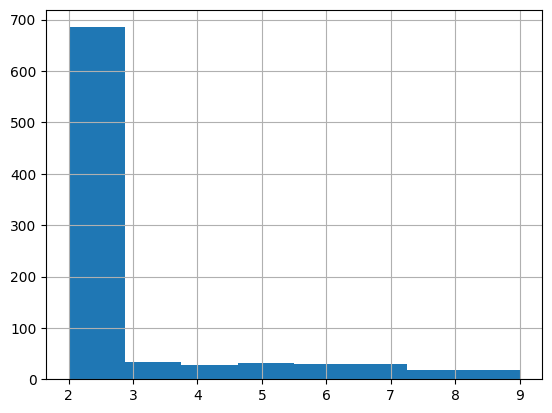

In [22]:
measurementRangesDf.measurement_datetime_range_updated.dt.days.apply(lambda x: x if x < 10 else None).hist(bins=8)

In [23]:
measurementRangesDf.measurement_datetime_range_updated.dt.days.apply(lambda x: x if x < 10 else None).value_counts().sort_index()

measurement_datetime_range_updated
2.0    685
3.0     33
4.0     28
5.0     31
6.0     30
7.0     29
8.0     19
9.0     18
Name: count, dtype: int64

In [24]:
from datetime import timedelta


data = []
for i, row in measurementRangesDf[['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime_min_updated', 'measurement_datetime_max']].drop_duplicates().iterrows():
    currentDate = row.measurement_datetime_min_updated
    while (currentDate <= row.measurement_datetime_max):
        data.append([row.PATIENT_ID, row.EPISODE_ID, currentDate])
        currentDate = currentDate + timedelta(days=1)

measurementDatesDf = pd.DataFrame(data, columns=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime'])
measurementDatesDf

,PATIENT_ID,EPISODE_ID,measurement_datetime
0,18849,12790706,2019-09-01
1,18849,12790706,2019-09-02
2,18849,12790706,2019-09-03
3,53162,15749998,2021-11-29
4,53162,15749998,2021-11-30
...,...,...,...
31173,2676371,17444357,2023-04-11
31174,2676371,17444357,2023-04-12
31175,2676371,17444357,2023-04-13
31176,2676371,17444357,2023-04-14


In [25]:
measurementRangesDf.measurement_datetime_range_updated.dt.days.value_counts().reset_index().apply(lambda x: ((x[0] + 1) * x[1]), axis=1).sum()

/tmp/ipykernel_361745/2660346801.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  measurementRangesDf.measurement_datetime_range_updated.dt.days.value_counts().reset_index().apply(lambda x: ((x[0] + 1) * x[1]), axis=1).sum()


np.int64(31178)

In [26]:
measurementDatesDf

,PATIENT_ID,EPISODE_ID,measurement_datetime
0,18849,12790706,2019-09-01
1,18849,12790706,2019-09-02
2,18849,12790706,2019-09-03
3,53162,15749998,2021-11-29
4,53162,15749998,2021-11-30
...,...,...,...
31173,2676371,17444357,2023-04-11
31174,2676371,17444357,2023-04-12
31175,2676371,17444357,2023-04-13
31176,2676371,17444357,2023-04-14


In [27]:
finalDf = measurementDatesDf.merge(
    dataDf,
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime']
)
finalDf

,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Systolic blood pressure_last,Systolic blood pressure_std,Temperature_mean,Temperature_min,Temperature_max,Temperature_first,Temperature_last,Temperature_std,sepsis,Organism_FIRST_NOTED
0,18849,12790706,2019-09-01,63.750000,50.0,74.0,74.0,69.0,7.497619,96.500,...,138.0,12.199971,37.477778,35.5,40.6,35.5,36.9,1.605286,0.0,2019-09-01
1,18849,12790706,2019-09-02,55.750000,48.0,61.0,54.0,48.0,6.020797,88.000,...,105.0,7.788881,36.875000,36.2,38.1,36.8,36.4,0.853913,0.0,2019-09-01
2,18849,12790706,2019-09-03,55.000000,47.0,69.0,48.0,47.0,10.165300,90.000,...,111.0,8.341663,36.750000,36.1,37.7,37.7,36.1,0.695222,0.0,2019-09-01
3,53162,15749998,2021-11-29,80.076923,70.0,91.0,75.0,86.0,6.264470,85.250,...,135.0,13.171940,36.225000,35.9,36.7,36.2,36.7,0.340343,0.0,2022-01-06
4,53162,15749998,2021-11-29,80.076923,70.0,91.0,75.0,86.0,6.264470,85.250,...,135.0,13.171940,36.225000,35.9,36.7,36.2,36.7,0.340343,0.0,2022-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50893,2676371,17444357,2023-04-14,76.000000,64.0,105.0,65.0,68.0,14.302847,72.625,...,138.0,9.739463,36.725000,36.1,37.2,36.9,36.8,0.353553,0.0,2023-04-21
50894,2676371,17444357,2023-04-15,69.800000,61.0,77.0,75.0,61.0,6.379655,89.000,...,124.0,12.502000,36.875000,36.6,37.1,37.1,37.1,0.262996,0.0,2023-04-21
50895,2676371,17444357,2023-04-15,69.800000,61.0,77.0,75.0,61.0,6.379655,89.000,...,124.0,12.502000,36.875000,36.6,37.1,37.1,37.1,0.262996,0.0,2023-04-21
50896,2676371,17444357,2023-04-15,69.800000,61.0,77.0,75.0,61.0,6.379655,89.000,...,124.0,12.502000,36.875000,36.6,37.1,37.1,37.1,0.262996,0.0,2023-04-21


In [33]:
finalDf.isna().sum()

PATIENT_ID                            0
EPISODE_ID                            0
measurement_datetime                  0
Diastolic blood pressure_mean         0
Diastolic blood pressure_min          0
Diastolic blood pressure_max          0
Diastolic blood pressure_first        0
Diastolic blood pressure_last         0
Diastolic blood pressure_std          0
Heart rate_mean                       0
Heart rate_min                        0
Heart rate_max                        0
Heart rate_first                      0
Heart rate_last                       0
Heart rate_std                        0
Mean blood pressure_mean              0
Mean blood pressure_min               0
Mean blood pressure_max               0
Mean blood pressure_first             0
Mean blood pressure_last              0
Mean blood pressure_std               0
Peripheral oxygen saturation_mean     0
Peripheral oxygen saturation_min      0
Peripheral oxygen saturation_max      0
Peripheral oxygen saturation_first    0


In [29]:
# finalDf = finalDf[['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime', 'Organism_FIRST_NOTED', 'concept_name', 'sepsis', 'value_mean', 'value_std', 'value_open', 'value_high', 'value_low', 'value_close']]
# finalDf['concept_name'] = 'Temperature'
finalDf = finalDf.drop(columns=['Organism_FIRST_NOTED']).merge(
    finalDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'Organism_FIRST_NOTED': 'first'}).reset_index(),
    how='inner',
    on=['PATIENT_ID', 'EPISODE_ID']
).drop(columns=['sepsis']).merge(
    finalDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'sepsis': 'max'}).reset_index(),
    how='inner',
    on=['PATIENT_ID', 'EPISODE_ID']
)
finalDf

,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Systolic blood pressure_last,Systolic blood pressure_std,Temperature_mean,Temperature_min,Temperature_max,Temperature_first,Temperature_last,Temperature_std,Organism_FIRST_NOTED,sepsis
0,18849,12790706,2019-09-01,63.750000,50.0,74.0,74.0,69.0,7.497619,96.500,...,138.0,12.199971,37.477778,35.5,40.6,35.5,36.9,1.605286,2019-09-01,0.0
1,18849,12790706,2019-09-02,55.750000,48.0,61.0,54.0,48.0,6.020797,88.000,...,105.0,7.788881,36.875000,36.2,38.1,36.8,36.4,0.853913,2019-09-01,0.0
2,18849,12790706,2019-09-03,55.000000,47.0,69.0,48.0,47.0,10.165300,90.000,...,111.0,8.341663,36.750000,36.1,37.7,37.7,36.1,0.695222,2019-09-01,0.0
3,53162,15749998,2021-11-29,80.076923,70.0,91.0,75.0,86.0,6.264470,85.250,...,135.0,13.171940,36.225000,35.9,36.7,36.2,36.7,0.340343,2022-01-06,0.0
4,53162,15749998,2021-11-29,80.076923,70.0,91.0,75.0,86.0,6.264470,85.250,...,135.0,13.171940,36.225000,35.9,36.7,36.2,36.7,0.340343,2022-01-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50893,2676371,17444357,2023-04-14,76.000000,64.0,105.0,65.0,68.0,14.302847,72.625,...,138.0,9.739463,36.725000,36.1,37.2,36.9,36.8,0.353553,2023-04-21,0.0
50894,2676371,17444357,2023-04-15,69.800000,61.0,77.0,75.0,61.0,6.379655,89.000,...,124.0,12.502000,36.875000,36.6,37.1,37.1,37.1,0.262996,2023-04-21,0.0
50895,2676371,17444357,2023-04-15,69.800000,61.0,77.0,75.0,61.0,6.379655,89.000,...,124.0,12.502000,36.875000,36.6,37.1,37.1,37.1,0.262996,2023-04-21,0.0
50896,2676371,17444357,2023-04-15,69.800000,61.0,77.0,75.0,61.0,6.379655,89.000,...,124.0,12.502000,36.875000,36.6,37.1,37.1,37.1,0.262996,2023-04-21,0.0


In [30]:
from tqdm import tqdm


for col in tqdm(finalDf.columns[~finalDf.columns.isin(['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime', 'Organism_FIRST_NOTED', 'sepsis'])]):
    filledDf = pd.DataFrame(columns=finalDf.columns)
    for (PATIENT_ID, EPISODE_ID), groupDf in finalDf.groupby(['PATIENT_ID', 'EPISODE_ID']):
        groupDf[col] = groupDf[col].fillna(groupDf[col].mean())
        filledDf = pd.concat([filledDf, groupDf], ignore_index=True)
    finalDf = filledDf

  0%|          | 0/42 [00:00<?, ?it/s]/tmp/ipykernel_361745/3982654728.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  filledDf = pd.concat([filledDf, groupDf], ignore_index=True)
  2%|▏         | 1/42 [00:02<01:30,  2.20s/it]/tmp/ipykernel_361745/3982654728.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  filledDf = pd.concat([filledDf, groupDf], ignore_index=True)
  5%|▍         | 2/42 [00:04<01:26,  2.16s/it]/tmp/ipykernel_361745/3982654728.py:8: FutureWarning: The behavior of DataFram

In [31]:
finalDf.sepsis.value_counts()/finalDf.shape[0]

sepsis
1.0    0.692837
0.0    0.307163
Name: count, dtype: float64

In [32]:
finalDf = finalDf.merge(
    pd.DataFrame(
        list(finalDf[finalDf.sepsis == 1].apply(lambda x: (x.loc['PATIENT_ID'], x.loc['EPISODE_ID'], x.loc['measurement_datetime'], (1 if (x.loc['measurement_datetime'] >= x.loc['Organism_FIRST_NOTED']) else 0)), axis=1)),
        columns=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime', 'target']
        ),
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime']
).fillna(0)
finalDf

/tmp/ipykernel_361745/2153657339.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(0)


,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Systolic blood pressure_std,Temperature_mean,Temperature_min,Temperature_max,Temperature_first,Temperature_last,Temperature_std,Organism_FIRST_NOTED,sepsis,target
0,18849,12790706,2019-09-01,63.750000,50.0,74.0,74.0,69.0,7.497619,96.500,...,12.199971,37.477778,35.5,40.6,35.5,36.9,1.605286,2019-09-01,0.0,0.0
1,18849,12790706,2019-09-02,55.750000,48.0,61.0,54.0,48.0,6.020797,88.000,...,7.788881,36.875000,36.2,38.1,36.8,36.4,0.853913,2019-09-01,0.0,0.0
2,18849,12790706,2019-09-03,55.000000,47.0,69.0,48.0,47.0,10.165300,90.000,...,8.341663,36.750000,36.1,37.7,37.7,36.1,0.695222,2019-09-01,0.0,0.0
3,53162,15749998,2021-11-29,80.076923,70.0,91.0,75.0,86.0,6.264470,85.250,...,13.171940,36.225000,35.9,36.7,36.2,36.7,0.340343,2022-01-06,0.0,0.0
4,53162,15749998,2021-11-29,80.076923,70.0,91.0,75.0,86.0,6.264470,85.250,...,13.171940,36.225000,35.9,36.7,36.2,36.7,0.340343,2022-01-06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103753,2676371,17444357,2023-04-14,76.000000,64.0,105.0,65.0,68.0,14.302847,72.625,...,9.739463,36.725000,36.1,37.2,36.9,36.8,0.353553,2023-04-21,0.0,0.0
103754,2676371,17444357,2023-04-15,69.800000,61.0,77.0,75.0,61.0,6.379655,89.000,...,12.502000,36.875000,36.6,37.1,37.1,37.1,0.262996,2023-04-21,0.0,0.0
103755,2676371,17444357,2023-04-15,69.800000,61.0,77.0,75.0,61.0,6.379655,89.000,...,12.502000,36.875000,36.6,37.1,37.1,37.1,0.262996,2023-04-21,0.0,0.0
103756,2676371,17444357,2023-04-15,69.800000,61.0,77.0,75.0,61.0,6.379655,89.000,...,12.502000,36.875000,36.6,37.1,37.1,37.1,0.262996,2023-04-21,0.0,0.0


In [34]:
finalDf.target.value_counts()/finalDf.shape[0]

target
0.0    0.575503
1.0    0.424497
Name: count, dtype: float64

In [ ]:
import os
from pathlib import Path


dataDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '02_data_matrix', 'balanced_data')
dataDirName.mkdir(exist_ok=True, parents=True)

finalDf.to_csv(Path(dataDirName, 'data_all_vitals.csv'), index=False)